In [25]:
import numpy as np
import os

In [4]:
palette = np.load('dataset/color_palettes/mtg_card_palettes_top8.npy')
print(palette.shape)

(19445,)


In [3]:
print(palette[0])

[[ 40  36  26]
 [121  98  80]
 [ 81  94 105]
 [ 30  39  33]
 [ 34  43  50]
 [168 144 127]
 [112  86  95]
 [150 159 170]]


In [9]:
palette = palette.tolist()


AttributeError: 'list' object has no attribute 'tolist'

In [22]:
lmin = 8
for i, obj in enumerate(palette):
    orig_len = len(obj)
    if orig_len < lmin:
        print(i, obj.dtype, len(obj))
    if obj.dtype != np.ndarray:
        obj_copy = np.copy(obj)
        obj_goal = np.zeros(shape=(8, 3))
        obj_goal[:len(obj_copy)] = obj_copy
        for j in range(orig_len, 8):
            idx = np.random.randint(0, orig_len)
            obj_goal[j] = obj_copy[idx]
        palette[i] = obj_goal
        

10105 int32 4


In [26]:
palette = np.array(palette)
print(palette.shape)
palette_path = os.path.join('Dataset',
                                'color_palettes',
                                'mtg_card_palettes_top{}.npy'.format(8))
np.save(palette_path, palette)

(19445, 8, 3)


In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(626, 457, 3)
457
0.81
370
256
(256, 256, 3)


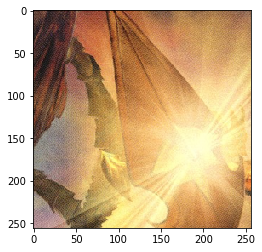

In [39]:
def card_crop(img_path, img_dim=256):
    img = cv2.imread(img_path)
    img = np.rot90(img)
    img = img[:, :, ::-1]
    print(img.shape)
    smallest_axis_len = min(img.shape[:2])
    print(smallest_axis_len)
    percent = np.random.randint(80, 101)/100
    print(percent)
    target_crop_size = int(smallest_axis_len*percent)
    print(target_crop_size)
    x_positions = img.shape[0]-target_crop_size
    y_positions = img.shape[1]-target_crop_size
    print(x_positions)
    rand_x = np.random.randint(x_positions)
    rand_y = np.random.randint(y_positions)
    img = img[rand_x:rand_x+target_crop_size,
              rand_y:rand_y+target_crop_size,
              :]
    img = img_resize(img, img_dim, img_dim)
    # randomly flip horizontally
    flip_val = np.random.randint(2)
    if flip_val == 0:
        img = img[:, ::-1, :]

    return img

path = "data/mtg_images/0b0c98ba-3505-40aa-b0f2-e03c9790f51e_1517813031_['W'].jpg"
img = card_crop(path)
print(img.shape)
plt.imshow(img)
plt.show()

In [31]:
def img_resize(img, y_dim, x_dim):
    if img.shape[0]*img.shape[1] < y_dim*x_dim:
        img = cv2.resize(img,
                         (y_dim, x_dim),
                         interpolation=cv2.INTER_CUBIC)
    else:
        img = cv2.resize(img,
                         (y_dim, x_dim),
                         interpolation=cv2.INTER_AREA)
    return img

def crop_square_from_rec(img, img_dim=256):
    img = cv2.imread(img)
    img = np.rot90(img)
    # resize based on smallest axis
    smallest_axis = img.shape[:2].index(min(img.shape[:2]))
    scale = img_dim/img.shape[smallest_axis]
    img = img_resize(img,
                     int(img.shape[0]*scale),
                     int(img.shape[1]*scale))

    # crop square from image
    smallest_axis = img.shape[:2].index(min(img.shape[:2]))
    largest_axis = [axis for axis in [0, 1] if axis != smallest_axis][0]
    largest_axis_len = img.shape[largest_axis]
    possible_crops = largest_axis_len-img_dim
    rand_position = np.random.randint(possible_crops)
    if smallest_axis == 0:
        img = img[:, rand_position:rand_position+img_dim, ::-1]
    else:
        img = img[rand_position:rand_position+img_dim, :, ::-1]
    return img
path = "data/mtg_images/0b0c98ba-3505-40aa-b0f2-e03c9790f51e_1517813031_['W'].jpg"
for _ in range(1000):
    img = crop_square_from_rec(path)
    
    if img.shape != (256, 256, 3):
        print(img.shape)
print('Job Finished')

Job Finished


In [16]:
start = np.zeros(shape=(5, ))
start += np.array([1, 1, 0, 0, 0])
print(start)

[1. 1. 0. 0. 0.]
